In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline


In [12]:
def fit_and_plot_model(df, model):
    # Create feature and target
    feature = df.drop('y', axis=1)
    target = df.y
    
    # Generate the linear regression model based on the data
    model.fit(feature, target)
    
    # Plot the data
    plt.scatter(df.x, df.y)

    # Plot the linear regression line
    plt.plot(df.x, model.predict(feature), 'r--')
    plt.show()
    
    return model

In [13]:
df_train = pd.read_csv('./train.csv')
# Load the test data
df_test = pd.read_csv('./test.csv')

In [14]:
feature_train = df_train.drop('y', axis=1)
target_train=df_train.y


In [15]:
lm_train = LinearRegression()
lm_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# train the model 
lm_train.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# Split up the test data into feature and target
feature_test = df_test.drop('y', axis=1)
target_test = df_test.y


In [18]:
# perform prediction using the test data
target_pred = lm_train.predict(feature_test)

In [19]:
# MEAN SQUARED ERROR from training linear regression model on data
print(f' MSE for linear regression: {mean_squared_error(target_test, target_pred)}')

#save results in a dictionary, key=model value=mean squared error value
results_dict = {}
results_dict['Linear Regressor'] = mean_squared_error(target_test, target_pred)


 MSE for linear regression: 679.2399376360044


In [20]:
results_dict

{'Linear Regressor': 679.2399376360044}

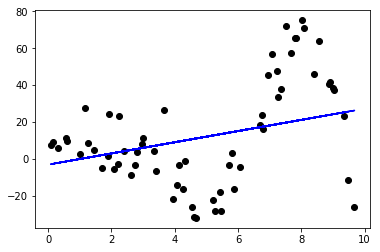

In [21]:
# Plot results to visualize how poorly the linear regression model models the test data
plt.scatter(feature_test, target_test, color='black')
plt.plot(feature_test, target_pred, color='blue')

#Now let's try a random forest

In [36]:
# Don't constrain the random forest, use default settings
dtr = DecisionTreeRegressor()
dtr.fit(feature_train, target_train)
dtr

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [45]:
rf_pred = dtr.predict(feature_test)

In [57]:

results_dict['Random Forest default'] = mean_squared_error(target_test, rf_pred)

In [66]:
# Constrain the max depth=3
dtr_d3 = DecisionTreeRegressor(max_depth=3)
dtr_d3.fit(feature_train, target_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [68]:
rf_pred_d3 = dtr_d3.predict(feature_test)
results_dict['Random Forest max_depth=3'] = mean_squared_error(target_test, rf_pred_d3)

In [69]:
results_dict

{'Linear Regressor': 679.2399376360044,
 'Random Forest default': 205.87845997706108,
 'Random Forest max_depth=3': 154.81535456701025}

In [74]:
# Max depth=3 max_leaf_nodes=3
dtr_d3_l3 = DecisionTreeRegressor(max_depth=3,max_leaf_nodes=3)
dtr_d3_l3.fit(feature_train, target_train)
rf_pred_d3_l3= dtr_d3_l3.predict(feature_test)
results_dict['Random Forest max_depth=3 max_leaf_node=3'] = mean_squared_error(target_test, rf_pred_d3_l3)

In [75]:
results_dict

{'Linear Regressor': 679.2399376360044,
 'Random Forest default': 205.87845997706108,
 'Random Forest max_depth=3': 154.81535456701025,
 'Random Forest max_depth=3 max_leaf_node=3': 264.0789251219443}

In [78]:
# Max leaf nodes=3 only, to limit the number of leaf nodes
dtr_l3 = DecisionTreeRegressor(max_leaf_nodes=3)
dtr_l3.fit(feature_train, target_train)
rf_pred_l3 = dtr_l3.predict(feature_test)
results_dict['Random Forest max_leaf_nodes=3'] = mean_squared_error(target_test, rf_pred_l3)


In [79]:
results_dict

{'Linear Regressor': 679.2399376360044,
 'Random Forest default': 205.87845997706108,
 'Random Forest max_depth=3': 154.81535456701025,
 'Random Forest max_depth=3 max_leaf_node=3': 264.0789251219443,
 'Random Forest max_leaf_nodes=3': 264.0789251219443}

In [81]:
# Now try max_depth=5
dtr_d5 = DecisionTreeRegressor(max_depth=5)
dtr_d5.fit(feature_train, target_train)
rf_pred_d5 = dtr_d5.predict(feature_test)
results_dict['Random Forest max_depth=5'] = mean_squared_error(target_test, rf_pred_d5)

In [82]:
results_dict

{'Linear Regressor': 679.2399376360044,
 'Random Forest default': 205.87845997706108,
 'Random Forest max_depth=3': 154.81535456701025,
 'Random Forest max_depth=3 max_leaf_node=3': 264.0789251219443,
 'Random Forest max_leaf_nodes=3': 264.0789251219443,
 'Random Forest max_depth=5': 132.96395912799343}

In [84]:
# Now try max_depth=7
dtr_d7 = DecisionTreeRegressor(max_depth=7)
dtr_d7.fit(feature_train, target_train)
rf_pred_d7=dtr_d7.predict(feature_test)
results_dict['Random Forest max_depth=7'] = mean_squared_error(feature_test, rf_pred_d7)

In [85]:
results_dict

{'Linear Regressor': 679.2399376360044,
 'Random Forest default': 205.87845997706108,
 'Random Forest max_depth=3': 154.81535456701025,
 'Random Forest max_depth=3 max_leaf_node=3': 264.0789251219443,
 'Random Forest max_leaf_nodes=3': 264.0789251219443,
 'Random Forest max_depth=5': 132.96395912799343,
 'Random Forest max_depth=7': 748.531951403879}

In [ ]:
# The best result, lower MSE is observed for the Random Forest model with a max depth of 5; MSE = 132.96